In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#drop the column "cutomerID" because it is not helpful.
df.drop('customerID',axis=1,inplace=True)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
#Here we tried to find out the customers whose Total charges is null or blank
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape
#we found 11 customers whose Total charges are blank or null

(11, 20)

In [13]:
#we removed the 11 customers
df1 = df[df.TotalCharges != " "]
df1.shape

(7032, 20)

In [15]:
#we changed the data type of Total Charges from Object to float64
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.dtypes

<ipython-input-15-140c05c60bc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure


In [ ]:
#if(churn == yes):
  #Leaving the company
#if(churn == no):
  #not leaving the company

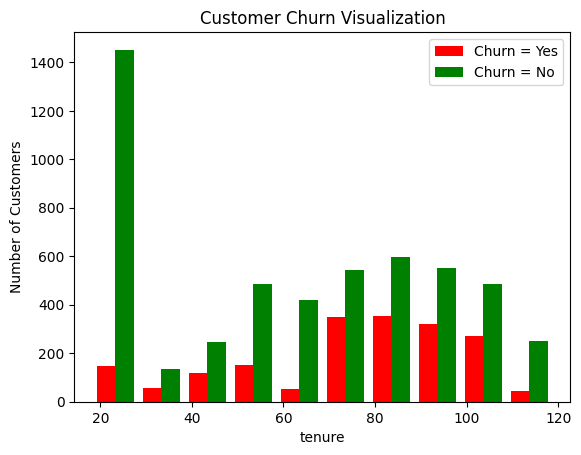

In [32]:
#churn means to find out how many customers wanted to leave the business services
#we made a visualization of how many customers wnated to stay and leave.
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],color = ['red','green'],label = ["Churn = Yes","Churn = No"])
plt.legend()

In [27]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

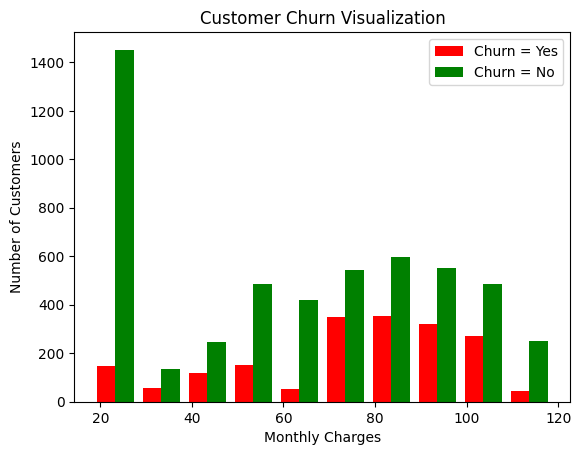

In [33]:
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Visualization")
plt.hist([mc_churn_yes,mc_churn_no],color = ['red','green'],label = ["Churn = Yes","Churn = No"])
plt.legend()

In [38]:
def print_unique_col_values(df):
  for column in df:
    if(df[column].dtypes == 'object'):
      print(f"{column} : {df[column].unique()}")

In [40]:
#Here we found out the unique values in a column to understand what
#are the different values present in each column
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [47]:
#data cleaning process
df1.replace("No internet service","No",inplace = True)
df1.replace("No phone service","No",inplace = True)


<ipython-input-47-ee9e4ab3008c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace = True)
<ipython-input-47-ee9e4ab3008c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace = True)


In [50]:
yes_no_columns = ["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup",
                  "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for col in yes_no_columns:
  df1[col].replace({"Yes":1,"No":0},inplace = True)


<ipython-input-50-82c968493e52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"Yes":1,"No":0},inplace = True)


In [52]:
#we replaced all yes and no with 1's and 0's
for col in df1:
  print(f"{col} : {df1[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [53]:
#we also replaced males with 0 and females with 1.
df1["gender"].replace({"Male":0,"Female":1},inplace = True)

<ipython-input-53-198693976b69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({"Male":0,"Female":1},inplace = True)


In [56]:
#here we performed one hot encoding for the three columns
df2 = pd.get_dummies(df1,["InternetService","Contract","PaymentMethod"])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [58]:
#Now all the data types are in int or float
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [59]:
#now we perform the scaling on the columns so that the values are balanced.
cols_to_scale = ["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
#we normalized the data so that higher values and lower values will be at same scale now.

In [60]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6733,0,0,0,0,0.366197,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4043,0,1,1,0,0.816901,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
1725,1,1,0,0,0.225352,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2800,1,0,1,1,0.267606,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5855,1,0,0,0,0.760563,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [61]:
#we just divided the dataset into dependent and independent variables.
X = df2.drop("Churn",axis = "columns") #independent variables
y = df2["Churn"] #dependent variable

In [62]:
#here we divided the dataset into training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

In [95]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26,input_shape = (26,), activation = "relu"),
    keras.layers.Dense(1,activation = "sigmoid")
])

model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
176/176 [==============================] - 3s 6ms/step - loss: 0.4997 - accuracy: 0.7541
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4261 - accuracy: 0.7966
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4194 - accuracy: 0.7995
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4161 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4138 - accuracy: 0.8050
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.8073
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8048
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8064
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8080
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4093 - accura

In [96]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.7875


[0.4586194157600403, 0.7874911427497864]

In [97]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.40145934],
       [0.4717948 ],
       [0.03369345],
       [0.79763687],
       [0.60483867]], dtype=float32)

In [98]:
y_pred = []
for ele in yp:
  if ele>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [99]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [100]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.66      0.54      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

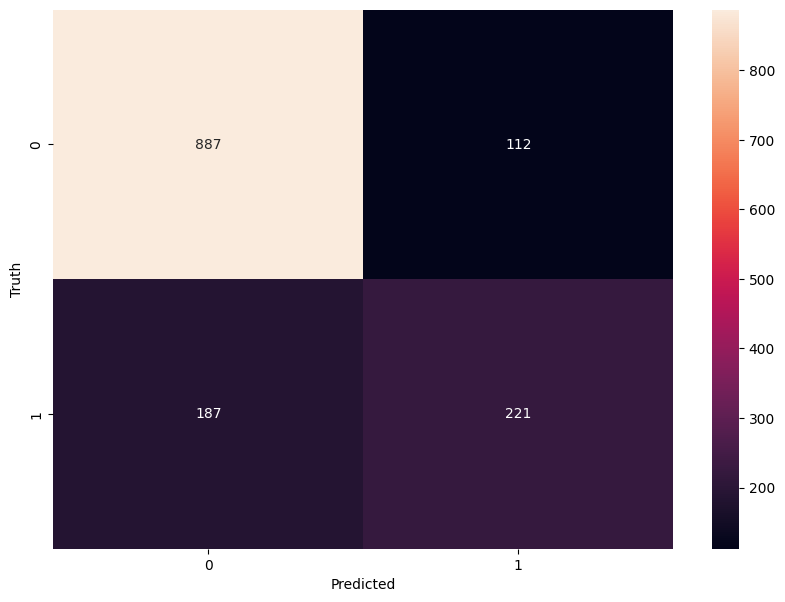

In [102]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#diagonal values are correct predicted.
#non diagonal values are wrong predicted.

In [103]:
#accuracy
round((887+221)/(887+187+112+221),2)

0.79

In [104]:
#precision for 0th class
round(887/(887+187),2)

0.83

In [105]:
#precision for 1th class
round(221/(221+112),2)

0.66

In [106]:
#recall for 0th class
round(887/(887+112),2)

0.89

In [107]:
#recall for 1th class
round(221/(221+187),2)

0.54